In [1]:
cd

/Users/ness001


In [2]:
cd ds/code_data 

/Users/ness001/ds/code_data


In [3]:
df=pd.read_csv('iris.csv')

Object `loc` not found.


In [7]:
df.loc[:,'SepalLength']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
      ... 
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 150, dtype: float64

In [4]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [5]:
slice=df['SepalLength']

In [6]:
from sklearn.cluster import KMeans

In [7]:
cls=KMeans(n_clusters=3,n_jobs=-1)

In [8]:
values=slice.values

In [9]:
cls.fit(values.reshape(len(slice),1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
cls.cluster_centers_

array([[4.95384615],
       [6.97142857],
       [5.95079365]])

In [11]:
centers=pd.DataFrame(data=cls.cluster_centers_)

In [12]:
centers

,0
0,4.953846
1,6.971429
2,5.950794


In [13]:
centers=centers.sort_values(by=0)

In [14]:
centers

,0
0,4.953846
2,5.950794
1,6.971429


In [15]:
edges=centers.rolling(2,center=False).mean()

In [16]:
edges

,0
0,NaN
2,5.452320
1,6.461111


In [17]:
edges=centers.rolling(2,center=False).mean()[1:]

In [18]:
edges[0]

2    5.452320
1    6.461111
Name: 0, dtype: float64

let's figure out whether that 0 means colname or index

In [19]:
edges.rename({0: 'col1'},axis=1,inplace=True)

In [20]:
edges

,col1
2,5.452320
1,6.461111


In [21]:
a=edges['col1']

In [22]:
a

2    5.452320
1    6.461111
Name: col1, dtype: float64

yes,0 means colname

In [50]:
slice_sorted=slice.sort_values()

In [51]:
slice_sorted=slice_sorted.reset_index(drop=True)

In [52]:
slice_sorted

0      4.3
1      4.4
2      4.4
3      4.4
4      4.5
5      4.6
6      4.6
7      4.6
8      4.6
9      4.7
      ... 
140    7.2
141    7.2
142    7.3
143    7.4
144    7.6
145    7.7
146    7.7
147    7.7
148    7.7
149    7.9
Name: SepalLength, Length: 150, dtype: float64

In [55]:
bins=[slice_sorted[0],slice_sorted[len(slice_sorted)-1]]

In [56]:
bins

[4.3, 7.9]

In [57]:
bins[1:1]=edges['col1']

In [58]:
bins

[4.3, 5.4523199023199025, 6.46111111111111, 7.9]

In [59]:
import seaborn as sns

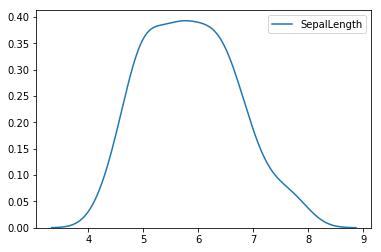

In [60]:
sns.kdeplot(slice)

In [61]:
cutted=pd.cut(slice,bins=bins,include_lowest=True)

In [62]:
cutted

0      (4.2989999999999995, 5.452]
1      (4.2989999999999995, 5.452]
2      (4.2989999999999995, 5.452]
3      (4.2989999999999995, 5.452]
4      (4.2989999999999995, 5.452]
5      (4.2989999999999995, 5.452]
6      (4.2989999999999995, 5.452]
7      (4.2989999999999995, 5.452]
8      (4.2989999999999995, 5.452]
9      (4.2989999999999995, 5.452]
                  ...             
140                   (6.461, 7.9]
141                   (6.461, 7.9]
142                 (5.452, 6.461]
143                   (6.461, 7.9]
144                   (6.461, 7.9]
145                   (6.461, 7.9]
146                 (5.452, 6.461]
147                   (6.461, 7.9]
148                 (5.452, 6.461]
149                 (5.452, 6.461]
Name: SepalLength, Length: 150, dtype: category
Categories (3, interval[float64]): [(4.2989999999999995, 5.452] < (5.452, 6.461] < (6.461, 7.9]]

In [63]:
cutted.value_counts()

(5.452, 6.461]                 63
(4.2989999999999995, 5.452]    52
(6.461, 7.9]                   35
Name: SepalLength, dtype: int64

In [64]:
cutted[0]

Interval(4.2989999999999995, 5.452, closed='right')

In [65]:
pd.get_dummies(cutted)

     (4.2989999999999995, 5.452]  (5.452, 6.461]  (6.461, 7.9]
0                              1               0             0
1                              1               0             0
2                              1               0             0
3                              1               0             0
4                              1               0             0
5                              1               0             0
6                              1               0             0
7                              1               0             0
8                              1               0             0
9                              1               0             0
..                           ...             ...           ...
140                            0               0             1
141                            0               0             1
142                            0               1             0
143                            0               0       

In [66]:
df.select_dtypes(include='number').head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [67]:
df.select_dtypes(exclude='number').head(3)

,Name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [68]:
df.select_dtypes(exclude='number').head(3).values

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [69]:
list(df.select_dtypes(exclude='number').head(3))

['Name']

In [70]:
list?

In [71]:
a=df['SepalLength']#series

In [72]:
a=df[['SepalLength']]

## stack

In [73]:
df.stack()

0    SepalLength               5.1
     SepalWidth                3.5
     PetalLength               1.4
     PetalWidth                0.2
     Name              Iris-setosa
1    SepalLength               4.9
     SepalWidth                  3
     PetalLength               1.4
     PetalWidth                0.2
     Name              Iris-setosa
                         ...      
148  SepalLength               6.2
     SepalWidth                3.4
     PetalLength               5.4
     PetalWidth                2.3
     Name           Iris-virginica
149  SepalLength               5.9
     SepalWidth                  3
     PetalLength               5.1
     PetalWidth                1.8
     Name           Iris-virginica
Length: 750, dtype: object

In [74]:
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [75]:
df.unstack()

SepalLength  0                 5.1
             1                 4.9
             2                 4.7
             3                 4.6
             4                   5
             5                 5.4
             6                 4.6
             7                   5
             8                 4.4
             9                 4.9
                         ...      
Name         140    Iris-virginica
             141    Iris-virginica
             142    Iris-virginica
             143    Iris-virginica
             144    Iris-virginica
             145    Iris-virginica
             146    Iris-virginica
             147    Iris-virginica
             148    Iris-virginica
             149    Iris-virginica
Length: 750, dtype: object

In [76]:
new=df.stack().sort_index(level=1)

In [77]:
new.head(3)

0  SepalLength    5.1
1  SepalLength    4.9
2  SepalLength    4.7
dtype: object

In [78]:
new=new.reset_index([1])

In [79]:
new

,level_1,0
0,SepalLength,5.1
1,SepalLength,4.9
2,SepalLength,4.7
3,SepalLength,4.6
4,SepalLength,5
5,SepalLength,5.4
6,SepalLength,4.6
7,SepalLength,5
8,SepalLength,4.4
9,SepalLength,4.9


In [80]:
new.rename(columns={'level_1' : 'feature'})

,feature,0
0,SepalLength,5.1
1,SepalLength,4.9
2,SepalLength,4.7
3,SepalLength,4.6
4,SepalLength,5
5,SepalLength,5.4
6,SepalLength,4.6
7,SepalLength,5
8,SepalLength,4.4
9,SepalLength,4.9


In [82]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
df.set_index('Name',inplace=True)

In [87]:
df.idxmax()

SepalLength    Iris-virginica
SepalWidth        Iris-setosa
PetalLength    Iris-virginica
PetalWidth     Iris-virginica
dtype: object

In [88]:
import pandas as pd
df = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,1,1,1], "C":["A","A","B","A"]})
df.drop_duplicates(subset=['A', 'C'], keep=False)

,A,B,C
2,foo,1,B
3,bar,1,A


In [89]:
df

,A,B,C
0,foo,0,A
1,foo,1,A
2,foo,1,B
3,bar,1,A


In [90]:
df1 = pd.DataFrame({'Name':['John','Mike','Smith','Wale','Marry','Tom','Menda','Bolt','Yuswa',],
    'Age':[23,45,12,34,27,44,28,39,40]})
df2 = pd.DataFrame({'Name':['John','Smith','Wale','Tom','Menda','Yuswa',],
    'Age':[23,12,34,44,28,40]})

In [91]:
df1

,Name,Age
0,John,23
1,Mike,45
2,Smith,12
3,Wale,34
4,Marry,27
5,Tom,44
6,Menda,28
7,Bolt,39
8,Yuswa,40


In [92]:
df2

,Name,Age
0,John,23
1,Smith,12
2,Wale,34
3,Tom,44
4,Menda,28
5,Yuswa,40


In [95]:
df1.set_index('Name',inplace=True)

In [96]:
df2.set_index('Name',inplace=True)

In [97]:
df1.drop(df2.index)

,Age
Name,
Mike,45
Marry,27
Bolt,39


In [98]:
df2.combine_first(df1)

,Age
Name,
Bolt,39.0
John,23.0
Marry,27.0
Menda,28.0
Mike,45.0
Smith,12.0
Tom,44.0
Wale,34.0
Yuswa,40.0


In [101]:
df1=pd.DataFrame({'A':['A0','A1','A2'],'B':['B0','B1','B2']})
df2=pd.DataFrame({'A':['C0','NaN','C2'],'D':['D0','D1','D2']})

In [102]:
df1

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [103]:
df2

,A,D
0,C0,D0
1,NaN,D1
2,C2,D2


In [104]:
df2.combine_first(df1)

,A,B,D
0,C0,B0,D0
1,NaN,B1,D1
2,C2,B2,D2


In [105]:
dfa = pd.DataFrame([[1, 2, 3], [4, np.nan, 5]], ['a', 'b'], ['w', 'x', 'y'])
dfb = pd.DataFrame([[1, 2, 3], [3, 4, 5]], ['b', 'c'], ['x', 'y', 'z'])

In [106]:
dfa


,w,x,y
a,1,2.0,3
b,4,NaN,5


In [107]:
dfb

,x,y,z
b,1,2,3
c,3,4,5


In [108]:
dfa.combine_first(dfb)

,w,x,y,z
a,1.0,2.0,3.0,NaN
b,4.0,1.0,5.0,3.0
c,NaN,3.0,4.0,5.0


In [109]:
dfa.fillna(dfb)

,w,x,y
a,1,2.0,3
b,4,1.0,5


In [117]:
s=pd.Series({'col1':['A','B','C']})

In [118]:
s

col1    [A, B, C]
dtype: object

In [120]:
s.replace({'A':10,'B':100})

col1    [A, B, C]
dtype: object

In [122]:
str = "h3110 23 cat 444.4 rabbit 11 2 dog"
[int(s) for s in str.split() if s.isdigit()]


[23, 11, 2]

In [123]:
str.split()

['h3110', '23', 'cat', '444.4', 'rabbit', '11', '2', 'dog']

In [126]:
df['SepalLength'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [127]:
value='2 year'

In [129]:
int(value[:2])

2

In [136]:
value[0],value[1],value[2]

('2', ' ', 'y')

In [137]:
int(value[0])

2

In [132]:
lang = 'python'
lang[0]
# p
lang[3]
# h

'p'

'h'

In [138]:
lang[:3] #doesn;t include lang[3]

'pyt'

In [155]:
df.apply(lambda x: x.mode()[0])

SepalLength              5
SepalWidth               3
PetalLength            1.5
PetalWidth             0.2
Name           Iris-setosa
dtype: object

In [158]:
df.mode().iloc[0]

SepalLength              5
SepalWidth               3
PetalLength            1.5
PetalWidth             0.2
Name           Iris-setosa
Name: 0, dtype: object

In [151]:
df[:1]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa


In [157]:
df['SepalLength'][0]

5.1

In [166]:
df.iloc[0]

SepalLength            5.1
SepalWidth             3.5
PetalLength            1.4
PetalWidth             0.2
Name           Iris-setosa
Name: 0, dtype: object

In [167]:
df[:1]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa


In [168]:
df.iloc[:,:2]

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [170]:
df.agg(['mean','std','max','min'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
max,7.900000,4.400000,6.900000,2.500000,Iris-virginica
min,4.300000,2.000000,1.000000,0.100000,Iris-setosa


In [174]:
df['Name'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Name, dtype: int64

In [173]:
df.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.groupby(['SepalLength','SepalWidth']).count().idxmax()[0]

(5.8, 2.7)

In [9]:
bool(-1)

True